In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
cvs_path = 'your_path/customer_churn.csv'
df_orginal = pd.read_csv(cvs_path)

In [3]:
df_orginal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Yes,0.0,0,20.94,129.09,1,Churned,Competitor
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,0.0,0,18.24,169.89,2,Churned,Other
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.0,0,97.20,917.70,3,Churned,Other
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,0.0,0,136.92,3182.97,3,Churned,Other
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,0.0,0,2172.17,7208.47,1,Churned,Competitor


In [4]:
df_orginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customerID                         7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   SeniorCitizen                      7043 non-null   int64  
 3   Partner                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   tenure                             7043 non-null   int64  
 6   PhoneService                       7043 non-null   object 
 7   MultipleLines                      7043 non-null   object 
 8   InternetService                    7043 non-null   object 
 9   OnlineSecurity                     7043 non-null   object 
 10  OnlineBackup                       7043 non-null   object 
 11  DeviceProtection                   7043 non-null   objec

In [5]:
selected_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
df = df_orginal[selected_columns]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
numerical_columns = []
categorical_columns = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)



encoded_categories = encoder.fit_transform(df[categorical_columns])

encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_columns))

df1 = pd.concat([encoded_df, df[numerical_columns]], axis=1)

/Users/mek/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mek/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mek/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mek/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

In [9]:
df1

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,2,53.85,108.15
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,2,70.70,151.65
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,8,99.65,820.50
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,28,104.80,3046.05
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0,49,103.70,5036.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0,72,21.15,1419.40
7039,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,24,84.80,1990.50
7040,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0,72,103.20,7362.90
7041,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,11,29.60,346.45


In [10]:
from sklearn.cluster import KMeans 
imodel = KMeans(init='k-means++', n_clusters=4, n_init=12, random_state=42)
imodel.fit(df1)

imodel.labels_

df['icluster'] = imodel.labels_
df1['icluster'] = imodel.labels_

/Users/mek/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mek/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mek/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/var/folders/7l/5p_87h4924z4dyx5qt156_x80000gn/T/ipykernel_57688/2125138393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [11]:
df1.groupby('icluster').mean()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
icluster,,,,,,,,,,,,,,,,,,,,,
0,0.503766,0.496234,0.676083,0.323917,0.728814,0.271186,0.108914,0.891086,0.681419,0.108914,...,0.473007,0.526993,0.134338,0.140301,0.360640,0.364721,0.121155,11.989956,48.216478,421.832894
1,0.492839,0.507161,0.384162,0.615838,0.664701,0.335299,0.090143,0.909857,0.311710,0.090143,...,0.316765,0.683235,0.294861,0.286436,0.321820,0.096883,0.206403,52.085931,82.698694,4171.905013
2,0.474956,0.525044,0.470831,0.529169,0.694755,0.305245,0.134355,0.865645,0.416618,0.134355,...,0.420153,0.579847,0.257513,0.241603,0.329405,0.171479,0.176783,37.400118,62.838362,1935.823512
3,0.505653,0.494347,0.238438,0.761562,0.660843,0.339157,0.000000,1.000000,0.145940,0.000000,...,0.283659,0.716341,0.338129,0.334018,0.282631,0.045221,0.216855,66.285714,100.409918,6654.743422


/Users/mek/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mek/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mek/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


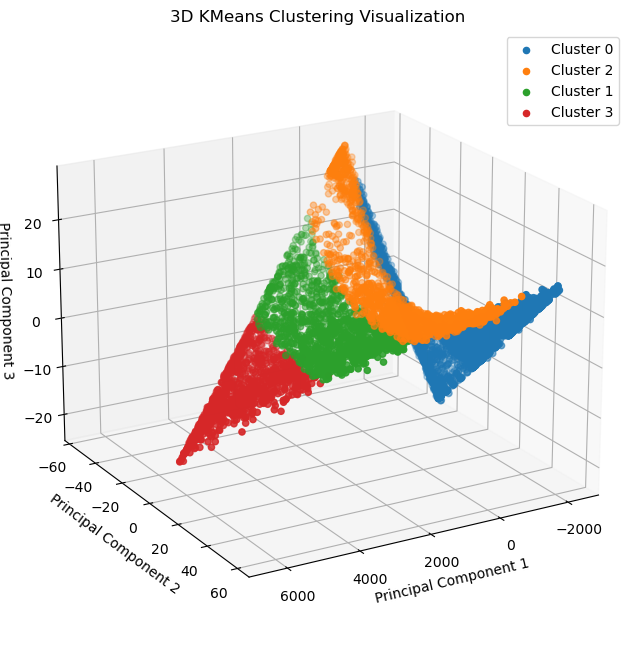

In [12]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
df1_reduced = pca.fit_transform(df1)

# Create a new DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(df1_reduced, columns=['PC1', 'PC2', 'PC3'])
pca_df['icluster'] = df1['icluster']

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in pca_df['icluster'].unique():
    ax.scatter(pca_df[pca_df['icluster'] == cluster]['PC1'],
               pca_df[pca_df['icluster'] == cluster]['PC2'],
               pca_df[pca_df['icluster'] == cluster]['PC3'],
               label=f'Cluster {cluster}')

ax.set_title('3D KMeans Clustering Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

ax.view_init(elev=20, azim=60)  # Elevation and azimuthal angles
plt.show()

In [13]:
df1.columns

Index(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_

In [14]:
X = df1.iloc[:, : -1].values
y = df1.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
X.shape[1]

45

In [16]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, 4)
y_test = tf.keras.utils.to_categorical(y_test, 4)

2024-10-28 22:30:33.691158: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model=Sequential()
model.add(Dense(units=256, activation='relu',input_dim=X.shape[1]))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=4, activation='softmax'))
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               11776     
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
Total params: 53,188
Trainable params: 53,188
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,epochs=100)


Epoch 1/100


/Users/mek/miniconda3/envs/tf/lib/python3.11/site-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


177/177 [==============================] - 1s 796us/step - loss: 10.8749 - accuracy: 0.5609
Epoch 2/100
177/177 [==============================] - 0s 767us/step - loss: 2.0726 - accuracy: 0.7373
Epoch 3/100
177/177 [==============================] - 0s 733us/step - loss: 2.8276 - accuracy: 0.7419
Epoch 4/100
177/177 [==============================] - 0s 725us/step - loss: 0.7868 - accuracy: 0.8523
Epoch 5/100
177/177 [==============================] - 0s 754us/step - loss: 0.2043 - accuracy: 0.9235
Epoch 6/100
177/177 [==============================] - 0s 739us/step - loss: 0.8205 - accuracy: 0.8621
Epoch 7/100
177/177 [==============================] - 0s 926us/step - loss: 0.4379 - accuracy: 0.8850
Epoch 8/100
177/177 [==============================] - 0s 728us/step - loss: 0.1927 - accuracy: 0.9320
Epoch 9/100
177/177 [==============================] - 0s 724us/step - loss: 0.4396 - accuracy: 0.8972
Epoch 10/100
177/177 [==============================] - 0s 727us/step - loss: 0.4155

In [26]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 601us/step - loss: 0.0406 - accuracy: 0.9837


[0.04062630981206894, 0.9836763739585876]